In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from astropy.coordinates import SkyCoord
from astropy import units as u

In [21]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')
act = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
pz14 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv')
pz14 = pz14[pz14['status'] != 'fp']
pz14 = pz14[pz14['z'] != -1]

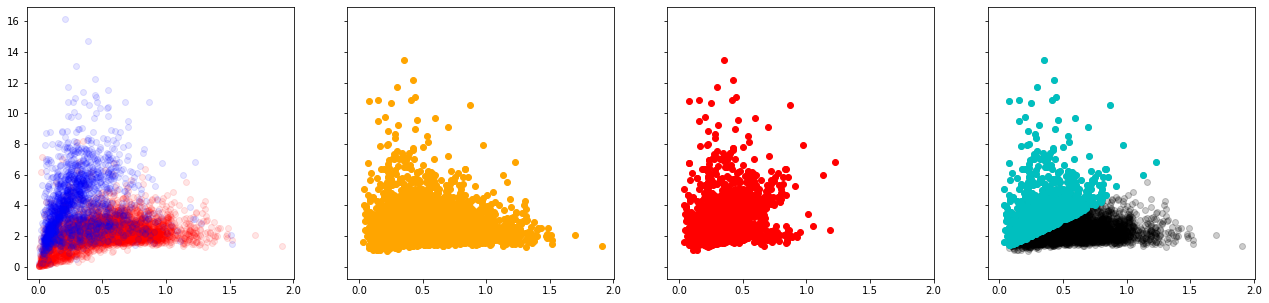

In [94]:
_, ax = plt.subplots(1, 4, figsize=(22,5), sharey=True, sharex=True)
tp = pz14[pz14['status'] == 'tp']
tp.index = np.arange(len(tp))
fn = pz14[pz14['status'] == 'fn']
ax[0].scatter(fn['z'], fn['M500'], c='r', alpha=0.1)
ax[0].scatter(tp['z'], tp['M500'], c='b', alpha=0.1)
ax[1].scatter(act['z'], act['M500'], c='orange')
ax[2].scatter(act_tr['z'], act_tr['M500'], c='r')
ax[3].scatter(act['z'], act['M500'], c='k', alpha=0.2)
ax[3].scatter(act_cut['z'], act_cut['M500'], c='c')

In [90]:
act_tr = []
z_rad = 0.125
m_rad = 0.5
for i in tqdm(range(len(tp))):
    matched = (act['z'] - tp['z']) / z_rad ** 2 + (act['M500'] - tp['M500']) / m_rad ** 2 <= 1
    act_tr.append(act[matched])

In [91]:
act_tr = pd.concat(act_tr)
len(act_tr)

974697

In [92]:
act_tr = act_tr.drop_duplicates(subset=['RA', 'DEC'])
len(act_tr)

569

In [89]:
act_cut = act.copy()
matched = act_cut['M500'] > 4 * act_cut['z'] + 1
act_cut = act_cut[matched]
act_cut.index = np.arange(len(act_cut))

In [93]:
act_tr = pd.concat([act_tr, act_cut], ignore_index=True)
len(act_tr)

1801

In [67]:
len(act)

4195

In [96]:
act_tr.to_csv('/home/rt2122/Data/clusters/acts/act_tr.csv', index=False)

In [97]:
act_tr = pd.read_csv('/home/rt2122/Data/clusters/acts/act_tr.csv')

In [98]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [100]:
sc_tr = SkyCoord(act_tr['RA']*u.degree, act_tr['DEC']*u.degree, frame='icrs')
sc_pz = SkyCoord(planck_z['RA']*u.degree, planck_z['DEC']*u.degree, frame='icrs')

In [102]:
matched = sc_tr.match_to_catalog_sky(sc_pz)[1].degree > 5/60
len(act_tr), len(planck_z), np.count_nonzero(matched)

(1801, 1094, 1431)

In [103]:
act_tr_wp = act_tr[matched]
act_tr_wp.to_csv('/home/rt2122/Data/clusters/acts/act_tr_wp.csv', index=False)

In [19]:
pz14 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv')
act = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
act_erosita = pd.read_csv('/home/rt2122/Data/clusters/tmp/act_erosita.csv')
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [7]:
pz14 = pz14[pz14['z'] != -1]
tp = pz14[pz14['status'] == 'tp']
fn = pz14[pz14['status'] == 'fn']

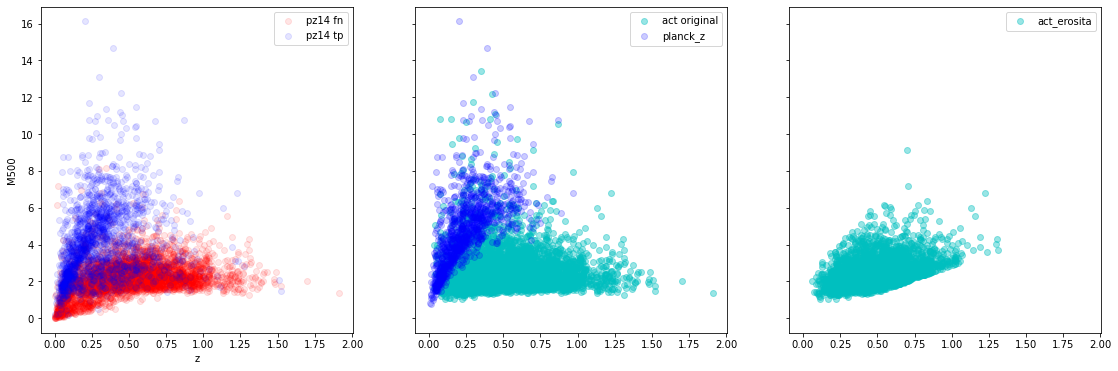

In [22]:
_, ax = plt.subplots(1, 3, figsize=(19, 6), sharex=True, sharey=True)
s = ax[0].scatter(fn['z'], fn['M500'], c='r', alpha=0.1)
s.set_label('pz14 fn')
s = ax[0].scatter(tp['z'], tp['M500'], c='b', alpha=0.1)
s.set_label('pz14 tp')
ax[0].set_xlabel('z')
ax[0].set_ylabel('M500')
ax[0].legend()

s = ax[1].scatter(act['z'], act['M500'], c='c', alpha=0.4)
s.set_label('act original')
s = ax[1].scatter(planck_z['z'], planck_z['M500'], c='b', alpha=0.2)
s.set_label('planck_z')
ax[1].legend()

s = ax[2].scatter(act_erosita['z'], act_erosita['M500'], c='c', alpha=0.4)
s.set_label('act_erosita')
ax[2].legend()

In [25]:
act_jan = act.copy()

In [27]:
sc_jan = SkyCoord(act_jan['RA']*u.degree, act_jan['DEC']*u.degree, frame='icrs')
sc_pz = SkyCoord(planck_z['RA']*u.degree, planck_z['DEC']*u.degree, frame='icrs')
matched = sc_jan.match_to_catalog_sky(sc_pz)[1].degree > 5/60
act_jan = act_jan[matched]
act_jan.index = np.arange(len(act_jan))

In [28]:
len(act), len(act_jan)

(4195, 3849)

In [53]:
matched = act_jan['M500'] > 3 * act_jan['z']

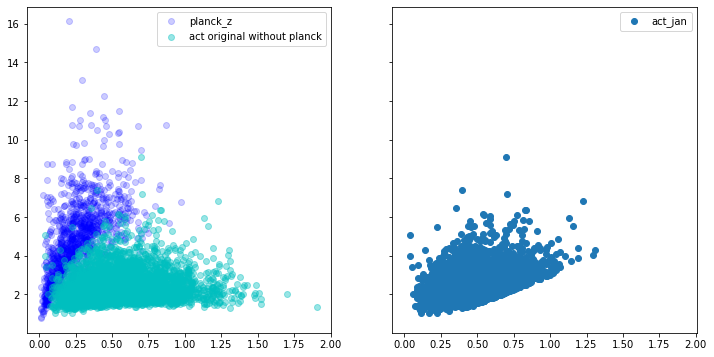

In [54]:
_, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
s = ax[0].scatter(planck_z['z'], planck_z['M500'], c='b', alpha=0.2)
s.set_label('planck_z')
s = ax[0].scatter(act_jan['z'], act_jan['M500'], c='c', alpha=0.4)
s.set_label('act original without planck')
ax[0].legend()

s = ax[1].scatter(act_jan['z'][matched], act_jan['M500'][matched])
s.set_label('act_jan')
ax[1].legend()

In [51]:
act_jan.to_csv('/home/rt2122/Data/clusters/acts/actwp.csv', index=False)

In [55]:
act_jan[matched].to_csv('/home/rt2122/Data/clusters/acts/act_jan_wp.csv', index=False)